In [180]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Clean Dataset


In [182]:
df=pd.read_csv('Gold_10years_stock.csv')

## Preveiw Raw Dataset

In [184]:
print(df.head(10))  

         Date     Price      Open      High       Low     Vol. Change %
0  01/02/2026  4,345.50  4,354.30  4,430.10  4,339.60    1.74K   -0.37%
1  01/01/2026  4,361.55  4,332.10  4,364.45  4,332.10    0.02K    0.10%
2  12/31/2025  4,357.10  4,373.30  4,398.40  4,300.00    1.47K   -1.02%
3  12/30/2025  4,402.20  4,367.00  4,435.30  4,355.60    3.54K    1.35%
4  12/29/2025  4,343.60  4,568.00  4,581.30  4,316.00  316.96K   -4.59%
5  12/26/2025  4,552.70  4,523.50  4,584.00  4,518.00  181.25K    0.56%
6  12/25/2025  4,527.50  4,505.40  4,539.65  4,505.30    6.84K    0.55%
7  12/24/2025  4,502.80  4,516.70  4,555.10  4,474.30  151.58K   -0.06%
8  12/23/2025  4,505.70  4,481.80  4,530.80  4,457.70  248.42K    0.81%
9  12/22/2025  4,469.40  4,369.90  4,484.50  4,367.90  203.04K    1.87%


## Clean the columns

In [186]:
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = df['Price'].str.replace(',', '').replace('', np.nan).astype(float)
df['Open']  = df['Open'].str.replace(',', '').astype(float)
df['High']  = df['High'].str.replace(',', '').astype(float)
df['Low']   = df['Low'].str.replace(',', '').astype(float)
df['Change %'] = df['Change %'].str.replace('%','').astype(float)
df['Vol.'] = df['Vol.'].str.replace('K','', regex=False).astype(float) * 1000


In [187]:
df = df.sort_values('Date').reset_index(drop=True)

In [188]:
df['Daily_Range'] = df['High'] - df['Low']      

In [189]:
print(df.head(10))  
print(df.dtypes)

        Date   Price    Open    High     Low      Vol.  Change %  Daily_Range
0 2016-12-05  1176.5  1182.6  1190.2  1158.6  221460.0     -0.11         31.6
1 2016-12-06  1170.1  1172.8  1177.1  1168.1  137610.0     -0.54          9.0
2 2016-12-07  1177.5  1171.4  1182.3  1167.2  145810.0      0.63         15.1
3 2016-12-08  1172.4  1176.1  1180.7  1170.9  147750.0     -0.43          9.8
4 2016-12-09  1161.9  1172.5  1173.8  1157.6  162820.0     -0.90         16.2
5 2016-12-12  1165.8  1161.4  1167.9  1152.5  166800.0      0.34         15.4
6 2016-12-13  1159.0  1164.5  1167.0  1156.3  142850.0     -0.58         10.7
7 2016-12-14  1163.7  1159.8  1168.0  1140.0  214400.0      0.41         28.0
8 2016-12-15  1129.8  1143.8  1146.0  1124.3  281610.0     -2.91         21.7
9 2016-12-16  1137.4  1130.5  1143.2  1128.5  178640.0      0.67         14.7
Date           datetime64[ns]
Price                 float64
Open                  float64
High                  float64
Low                   

## Lag features 

In [191]:
df['Prev_Price'] = df['Price'].shift(1)
df['Prev_Open'] = df['Open'].shift(1)
df['Prev_High'] = df['High'].shift(1)
df['Prev_Low'] = df['Low'].shift(1)
df['Prev_Vol'] = df['Vol.'].shift(1)
df['Prev_Daily_Range'] = df['Daily_Range'].shift(1)

In [192]:
df['Next_Price'] = df['Price'].shift(-1)

In [193]:
df['Next_Day_Change'] = df['Next_Price'] - df['Prev_Price']

In [194]:
df = df.dropna()

## Cleaned dataset

In [196]:
print(df.head(10))  

         Date   Price    Open    High     Low      Vol.  Change %  \
1  2016-12-06  1170.1  1172.8  1177.1  1168.1  137610.0     -0.54   
2  2016-12-07  1177.5  1171.4  1182.3  1167.2  145810.0      0.63   
3  2016-12-08  1172.4  1176.1  1180.7  1170.9  147750.0     -0.43   
4  2016-12-09  1161.9  1172.5  1173.8  1157.6  162820.0     -0.90   
5  2016-12-12  1165.8  1161.4  1167.9  1152.5  166800.0      0.34   
6  2016-12-13  1159.0  1164.5  1167.0  1156.3  142850.0     -0.58   
7  2016-12-14  1163.7  1159.8  1168.0  1140.0  214400.0      0.41   
8  2016-12-15  1129.8  1143.8  1146.0  1124.3  281610.0     -2.91   
9  2016-12-16  1137.4  1130.5  1143.2  1128.5  178640.0      0.67   
10 2016-12-19  1142.7  1136.1  1144.4  1135.5  119180.0      0.47   

    Daily_Range  Prev_Price  Prev_Open  Prev_High  Prev_Low  Prev_Vol  \
1           9.0      1176.5     1182.6     1190.2    1158.6  221460.0   
2          15.1      1170.1     1172.8     1177.1    1168.1  137610.0   
3           9.8      

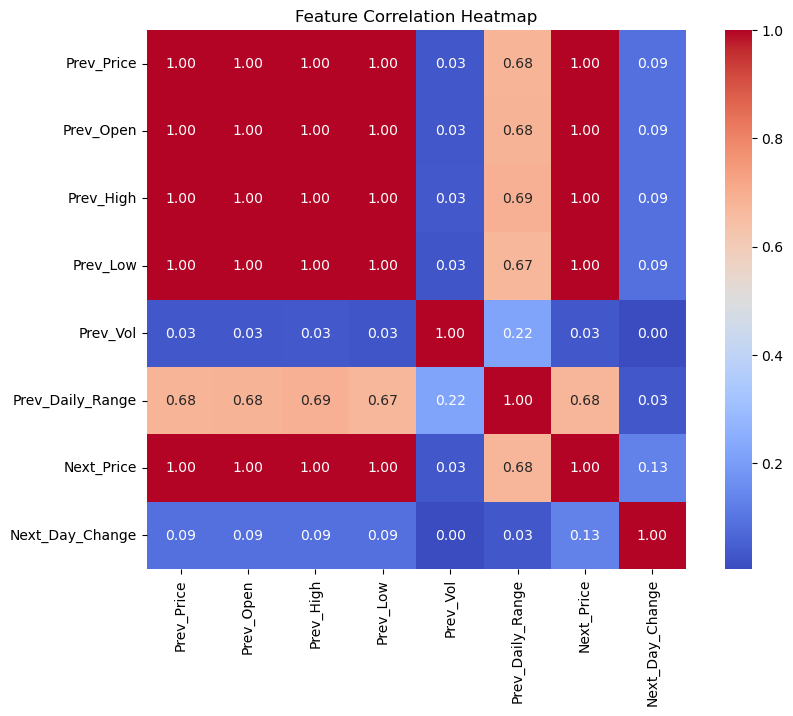

In [197]:
correlation_matrix = df[['Prev_Price','Prev_Open','Prev_High','Prev_Low','Prev_Vol','Prev_Daily_Range',
                         'Next_Price','Next_Day_Change']].corr()

# Plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# Supervised Learning

## Linear Regression

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [201]:
X = df[['Prev_Price','Prev_Open','Prev_High','Prev_Low','Prev_Vol','Prev_Daily_Range']]

y = df['Next_Price']

In [202]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, shuffle=False)

In [203]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [204]:
y_pred = lr_model.predict(X_test)

In [205]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

Linear Regression Performance:
MAE  : 38.54
RMSE : 53.14
R²   : 0.9929


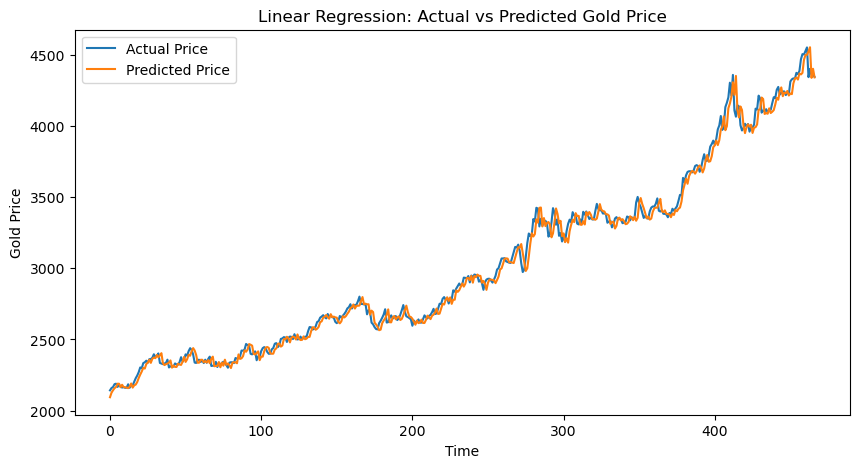

In [206]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Gold Price')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [207]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})

print(coeff_df)

            Feature   Coefficient
0        Prev_Price  6.774801e-01
1         Prev_Open -2.817452e-01
2         Prev_High  3.017719e-01
3          Prev_Low  3.000658e-01
4          Prev_Vol  3.239161e-07
5  Prev_Daily_Range  1.706096e-03


In [208]:
last_day = df.iloc[[-1]]  
print("Last day in the dataset (previous day info):")
print(last_day.to_string(index=False, float_format='{:,.2f}'.format))


last_day_features = X.iloc[[-1]]  
next_day_pred = lr_model.predict(last_day_features)[0]

print(f"\nPredicted gold price for the next day: {next_day_pred:.2f}")


Last day in the dataset (previous day info):
      Date    Price     Open     High      Low  Vol.  Change %  Daily_Range  Prev_Price  Prev_Open  Prev_High  Prev_Low  Prev_Vol  Prev_Daily_Range  Next_Price  Next_Day_Change
2026-01-01 4,361.55 4,332.10 4,364.45 4,332.10 20.00      0.10        32.35    4,357.10   4,373.30   4,398.40  4,300.00  1,470.00             98.40    4,345.50           -11.60

Predicted gold price for the next day: 4342.36


## Support vector regression

In [210]:
    from sklearn.model_selection import train_test_split
    from sklearn.svm import LinearSVR
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import matplotlib.pyplot as plt
    import numpy as np

In [211]:
X = df[['Prev_Price','Prev_Open','Prev_High','Prev_Low','Prev_Vol','Prev_Daily_Range']]
y = df['Next_Price']


In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [213]:
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [214]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [215]:
lin_svr = LinearSVR(C=1.0, epsilon=0.01, max_iter=10000)
lin_svr.fit(X_train_scaled, y_train_scaled)

LinearSVR(epsilon=0.01, max_iter=10000)

In [216]:
y_pred_lin_scaled = lin_svr.predict(X_test_scaled)
y_pred_lin = y_scaler.inverse_transform(y_pred_lin_scaled.reshape(-1,1)).ravel()

In [217]:
mae = mean_absolute_error(y_test, y_pred_lin)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2 = r2_score(y_test, y_pred_lin)

print(f"LinearSVR Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

LinearSVR Performance:
MAE  : 38.08
RMSE : 52.72
R²   : 0.9930


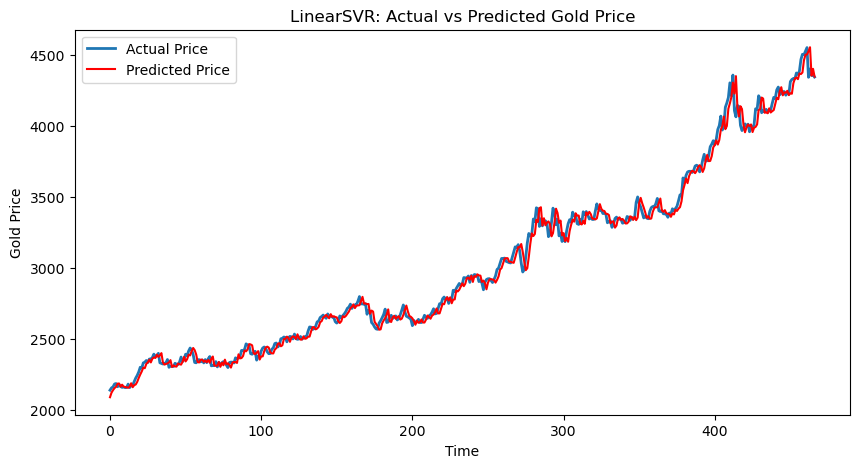

In [218]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Price', linewidth=2)
plt.plot(y_pred_lin, label='Predicted Price', color='red')
plt.title('LinearSVR: Actual vs Predicted Gold Price')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()


In [219]:
last_day = df.iloc[[-1]] 
print("Last day in the dataset (previous day info):")
print(last_day.to_string(index=False, float_format='{:,.2f}'.format))

last_day_features = X.iloc[[-1]]
last_day_scaled = X_scaler.transform(last_day_features)

next_day_pred_scaled = lin_svr.predict(last_day_scaled)
next_day_pred_lin_svr = y_scaler.inverse_transform(next_day_pred_scaled.reshape(-1,1))[0][0]

print(f"\nPredicted gold price for the next day (LinearSVR): {next_day_pred_lin_svr:.2f}")


Last day in the dataset (previous day info):
      Date    Price     Open     High      Low  Vol.  Change %  Daily_Range  Prev_Price  Prev_Open  Prev_High  Prev_Low  Prev_Vol  Prev_Daily_Range  Next_Price  Next_Day_Change
2026-01-01 4,361.55 4,332.10 4,364.45 4,332.10 20.00      0.10        32.35    4,357.10   4,373.30   4,398.40  4,300.00  1,470.00             98.40    4,345.50           -11.60

Predicted gold price for the next day (LinearSVR): 4348.61


## Random Forest Regression

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


In [222]:
X = df[['Prev_Price','Prev_Open','Prev_High','Prev_Low','Prev_Vol','Prev_Daily_Range']]
y = df['Next_Day_Change']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [224]:
rf_model = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, n_estimators=500, random_state=42)

In [225]:
y_pred_change = rf_model.predict(X_test)
y_pred_price = X_test['Prev_Price'].values + y_pred_change

In [226]:
mae = mean_absolute_error(df['Next_Price'].iloc[-len(y_test):], y_pred_price)
rmse = np.sqrt(mean_squared_error(df['Next_Price'].iloc[-len(y_test):], y_pred_price))
r2 = r2_score(df['Next_Price'].iloc[-len(y_test):], y_pred_price)

print("Random Forest Regression (predicting daily change) Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

Random Forest Regression (predicting daily change) Performance:
MAE  : 43.44
RMSE : 57.50
R²   : 0.9917


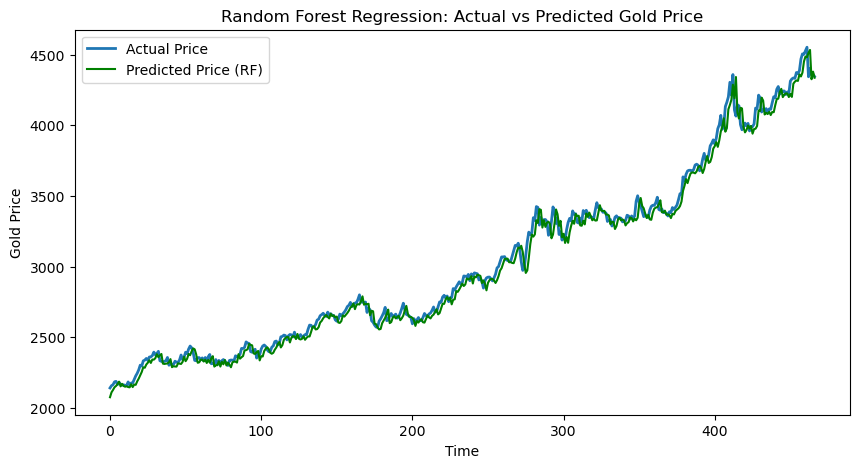

In [227]:
plt.figure(figsize=(10,5))
plt.plot(df['Next_Price'].iloc[-len(y_test):].values, label='Actual Price', linewidth=2)
plt.plot(y_pred_price, label='Predicted Price (RF)', color='green')
plt.title('Random Forest Regression: Actual vs Predicted Gold Price')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [228]:
last_features = X.iloc[[-1]]
next_day_change = rf_model.predict(last_features)[0]
next_day_price = last_features['Prev_Price'].values[0] + next_day_change

print("\nLast day info (previous-day features):")
print(last_features.to_string(index=False, float_format='{:,.2f}'.format))
print(f"\nPredicted gold price for the next day: {next_day_price:.2f}")



Last day info (previous-day features):
 Prev_Price  Prev_Open  Prev_High  Prev_Low  Prev_Vol  Prev_Daily_Range
   4,357.10   4,373.30   4,398.40  4,300.00  1,470.00             98.40

Predicted gold price for the next day: 4336.92


## Decision Tree

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [232]:
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [233]:
y_pred_change = dt_model.predict(X_test)
y_pred_price = X_test['Prev_Price'].values + y_pred_change

In [234]:
mae = mean_absolute_error(df['Next_Price'].iloc[-len(y_test):], y_pred_price)
rmse = np.sqrt(mean_squared_error(df['Next_Price'].iloc[-len(y_test):], y_pred_price))
r2 = r2_score(df['Next_Price'].iloc[-len(y_test):], y_pred_price)

print("Decision Tree Regression (predicting daily change) Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

Decision Tree Regression (predicting daily change) Performance:
MAE  : 38.24
RMSE : 53.12
R²   : 0.9929


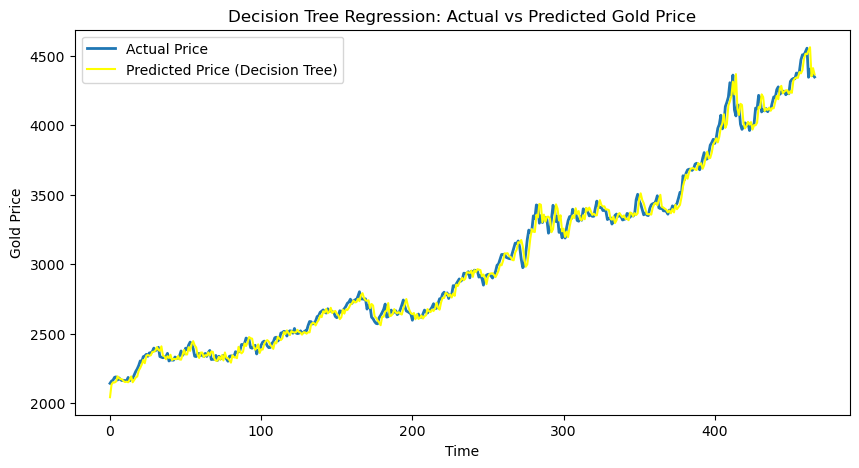

In [235]:
plt.figure(figsize=(10,5))
plt.plot(df['Next_Price'].iloc[-len(y_test):].values, label='Actual Price', linewidth=2)
plt.plot(y_pred_price, label='Predicted Price (Decision Tree)', color='yellow')
plt.title('Decision Tree Regression: Actual vs Predicted Gold Price')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [236]:
last_features = X.iloc[[-1]]
next_day_change = dt_model.predict(last_features)[0]
next_day_price = last_features['Prev_Price'].values[0] + next_day_change

print("\nLast day info (previous-day features):")
print(last_features.to_string(index=False, float_format='{:,.2f}'.format))
print(f"\nPredicted gold price for the next day (Decision Tree): {next_day_price:.2f}")


Last day info (previous-day features):
 Prev_Price  Prev_Open  Prev_High  Prev_Low  Prev_Vol  Prev_Daily_Range
   4,357.10   4,373.30   4,398.40  4,300.00  1,470.00             98.40

Predicted gold price for the next day (Decision Tree): 4364.10


# Unsupervised learning

## K-means clustering

In [239]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score


In [240]:
features_for_clustering = df[['Next_Day_Change', 'Prev_Daily_Range']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

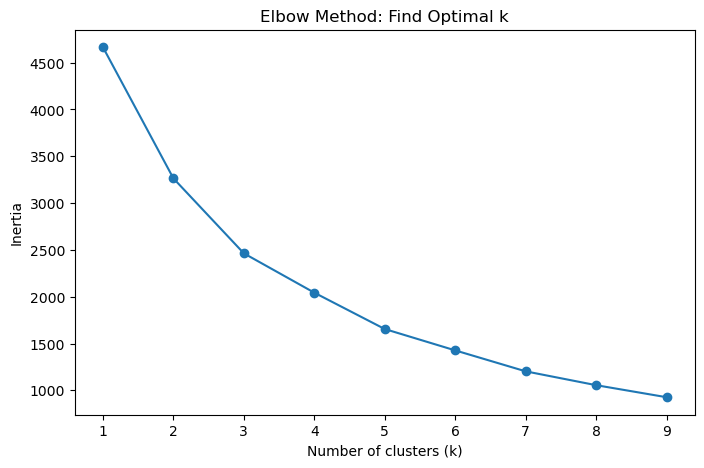

In [241]:
inertia_list = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia_list.append(kmeans.inertia_)

# Plot elbow
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia_list, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method: Find Optimal k')
plt.show()

In [242]:
k = 4
kmeans_model = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans_model.fit_predict(scaled_features)

df['Movement_Cluster'] = cluster_labels

In [243]:
cluster_means = df.groupby('Movement_Cluster')['Next_Day_Change'].mean().sort_values()

In [244]:
cluster_label_mapping = {}
for i, cluster_num in enumerate(cluster_means.index):
    if i == 0:
        cluster_label_mapping[cluster_num] = 'Strong Down Day'
    elif i == 1:
        cluster_label_mapping[cluster_num] = 'Down Day'
    elif i == 2:
        cluster_label_mapping[cluster_num] = 'Up Day'
    else:
        cluster_label_mapping[cluster_num] = 'Strong Up Day'

In [245]:
df['Movement_Cluster_Label'] = df['Movement_Cluster'].map(cluster_label_mapping)

In [246]:
cluster_summary = df.groupby('Movement_Cluster')['Next_Day_Change'].agg(['count','mean','min','max'])
print("Cluster Summary (daily movement type):")
print(cluster_summary)

Cluster Summary (daily movement type):
                  count       mean    min    max
Movement_Cluster                                
0                  1239 -11.259031  -89.8    9.4
1                   100  70.584500   16.9  187.3
2                   867  20.585352   -2.7   81.9
3                   126 -37.595079 -294.0   36.5


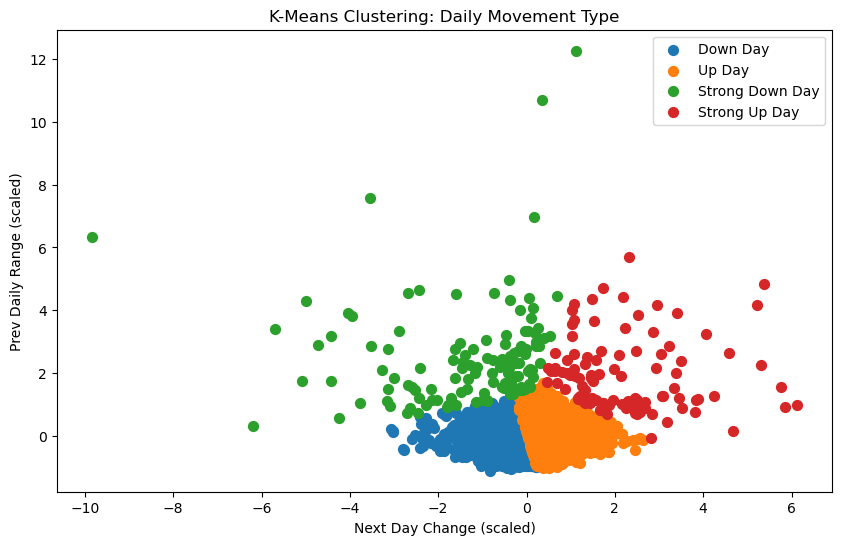

In [247]:
plt.figure(figsize=(10,6))
for label in df['Movement_Cluster_Label'].unique():
    points = scaled_features[df['Movement_Cluster_Label'] == label]
    plt.scatter(points[:,0], points[:,1], label=label, s=50)

plt.xlabel('Next Day Change (scaled)')
plt.ylabel('Prev Daily Range (scaled)')
plt.title('K-Means Clustering: Daily Movement Type')
plt.legend()
plt.show()

In [248]:
print("\nSample days from each cluster:")
for label in df['Movement_Cluster_Label'].unique():
    print(f"\n{label}:")
    print(df[df['Movement_Cluster_Label']==label][['Next_Price','Prev_Price','Next_Day_Change','Prev_Daily_Range']].head(5))


Sample days from each cluster:

Down Day:
   Next_Price  Prev_Price  Next_Day_Change  Prev_Daily_Range
1      1177.5      1176.5              1.0              31.6
2      1172.4      1170.1              2.3               9.0
3      1161.9      1177.5            -15.6              15.1
4      1165.8      1172.4             -6.6               9.8
5      1159.0      1161.9             -2.9              16.2

Up Day:
    Next_Price  Prev_Price  Next_Day_Change  Prev_Daily_Range
9       1142.7      1129.8             12.9              21.7
16      1158.1      1138.8             19.3              18.9
17      1151.7      1140.9             10.8               8.0
19      1165.3      1151.7             13.6              14.0
20      1181.3      1162.0             19.3              19.5

Strong Down Day:
     Next_Price  Prev_Price  Next_Day_Change  Prev_Daily_Range
795      1560.1      1560.2             -0.1              59.9
840      1516.7      1642.3           -125.6              39.4
841

## Hierarchial Clustering

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

In [251]:
features = df[['Next_Day_Change', 'Prev_Daily_Range']].values

In [252]:
Z = linkage(features, method='ward')

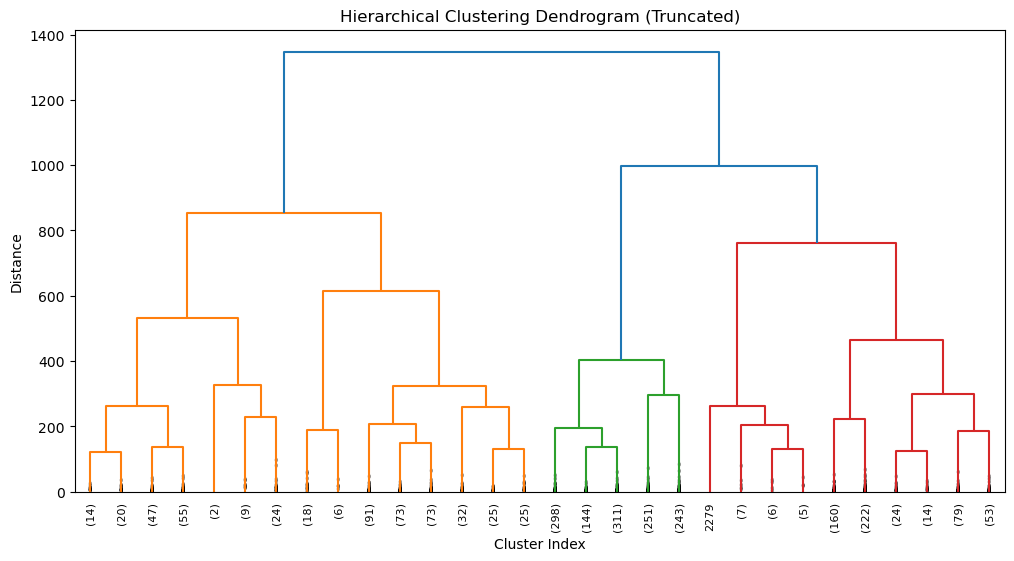

In [253]:
plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=30,                  
    leaf_rotation=90,
    leaf_font_size=8,
    show_contracted=True    
)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()

In [254]:
df['HierCluster'] = fcluster(Z, t=3, criterion='maxclust')

In [255]:
cluster_summary = df.groupby('HierCluster')['Next_Day_Change'].describe()
print(cluster_summary)

              count       mean        std    min     25%    50%    75%    max
HierCluster                                                                  
1             514.0  32.485739  33.438916  -47.9  13.925  31.85  47.00  187.3
2            1247.0   4.763031   9.595231  -15.1  -2.400   3.80  11.55   29.3
3             571.0 -28.753310  26.777924 -294.0 -32.100 -21.10 -14.05   -1.2


## DBSCAN

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [258]:
features = df[['Next_Day_Change', 'Prev_Daily_Range']].values

In [259]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [260]:
dbscan = DBSCAN(eps=0.5, min_samples=5) 
dbscan.fit(features_scaled)

DBSCAN()

In [261]:
df['DBSCAN_Cluster'] = dbscan.labels_  

In [262]:
cluster_summary = df.groupby('DBSCAN_Cluster')['Next_Day_Change'].describe()
print(cluster_summary)

                 count      mean         std    min   25%   50%    75%    max
DBSCAN_Cluster                                                               
-1                57.0  1.552632  113.839218 -294.0 -92.4  33.4  91.00  187.3
 0              2275.0  2.694738   24.790028  -96.2 -10.1   1.5  14.35  131.0


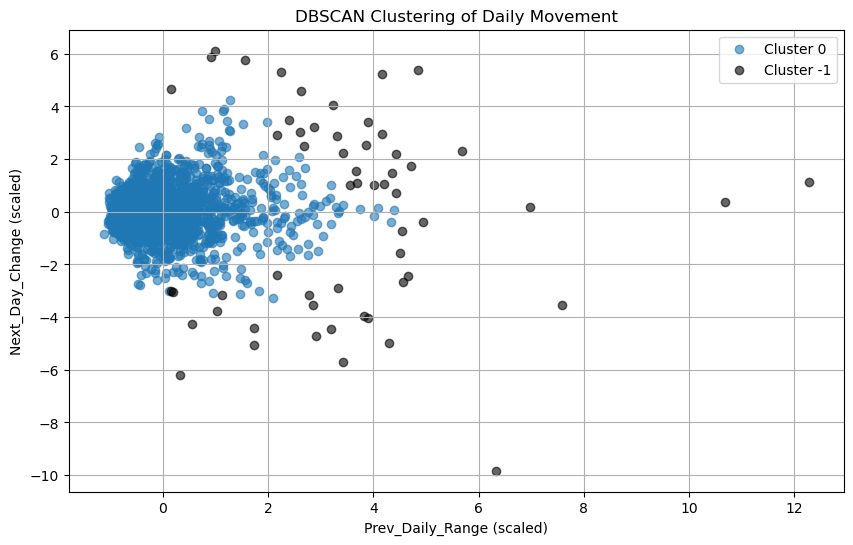

In [263]:
plt.figure(figsize=(10,6))
unique_labels = set(dbscan.labels_)
colors = plt.cm.tab10(range(len(unique_labels)))  

for k, col in zip(unique_labels, colors):
    cluster_points = features_scaled[dbscan.labels_ == k]
    if k == -1:
        color = 'k'
    else:
        color = col
    plt.scatter(
        cluster_points[:, 1],
        cluster_points[:, 0], 
        color=color,
        label=f'Cluster {k}',
        alpha=0.6
    )

plt.title('DBSCAN Clustering of Daily Movement')
plt.xlabel('Prev_Daily_Range (scaled)')
plt.ylabel('Next_Day_Change (scaled)')
plt.legend()
plt.grid(True)
plt.show()


## Gaussian Mixture Model

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [266]:
features = df[['Next_Day_Change', 'Prev_Daily_Range']].values

In [267]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [268]:
n_clusters = 3 
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
gmm.fit(features_scaled)

GaussianMixture(n_components=3, random_state=42)

In [269]:
df['GMM_Cluster'] = gmm.predict(features_scaled)

In [270]:
cluster_summary = df.groupby('GMM_Cluster')['Next_Day_Change'].describe()
print(cluster_summary)

              count      mean        std    min   25%   50%     75%    max
GMM_Cluster                                                               
0             870.0  4.498345  32.176153  -89.8 -16.4  4.85  26.600   88.3
1             168.0  8.308750  76.684567 -294.0 -31.5  7.15  49.075  187.3
2            1294.0  0.702937  13.287513  -38.7  -8.1  0.30   9.200   39.0


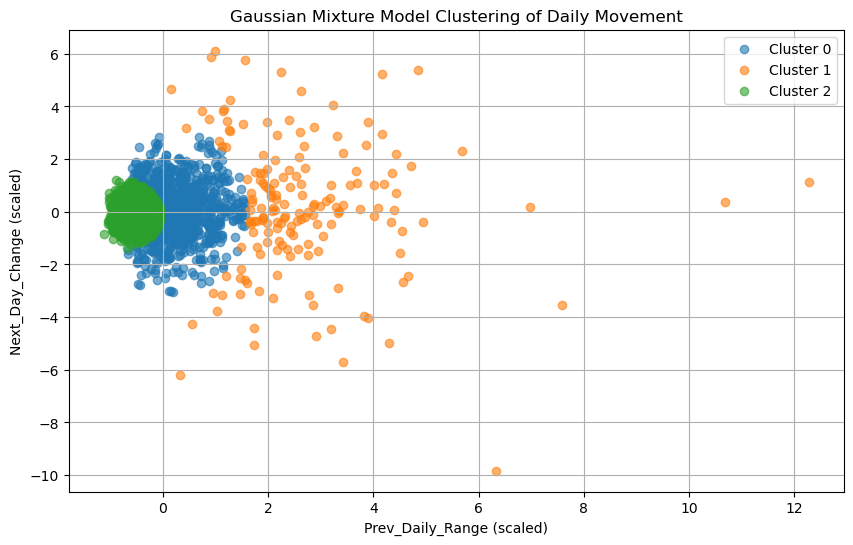

In [271]:
plt.figure(figsize=(10,6))
unique_labels = sorted(df['GMM_Cluster'].unique())
colors = plt.cm.tab10(range(len(unique_labels)))

for k, col in zip(unique_labels, colors):
    cluster_points = features_scaled[df['GMM_Cluster'] == k]
    plt.scatter(
        cluster_points[:, 1], 
        cluster_points[:, 0],  
        color=col,
        label=f'Cluster {k}',
        alpha=0.6
    )

plt.title('Gaussian Mixture Model Clustering of Daily Movement')
plt.xlabel('Prev_Daily_Range (scaled)')
plt.ylabel('Next_Day_Change (scaled)')
plt.legend()
plt.grid(True)
plt.show()

# Comparision Bar Graph(Supervised model comparision)

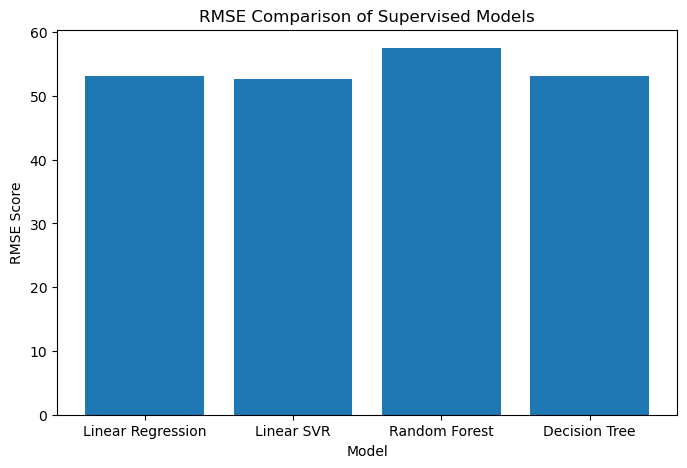

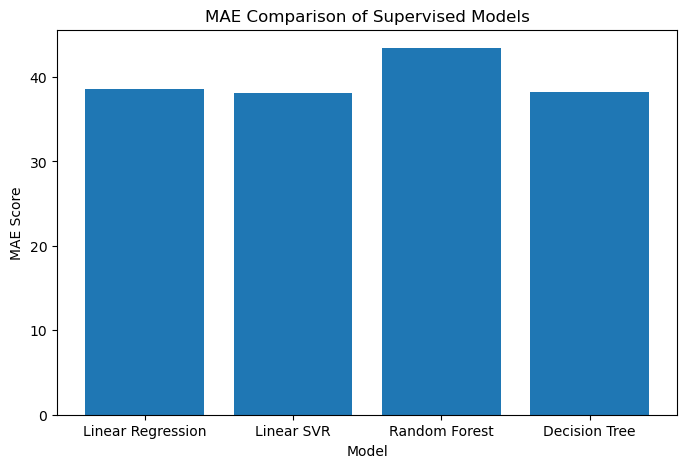

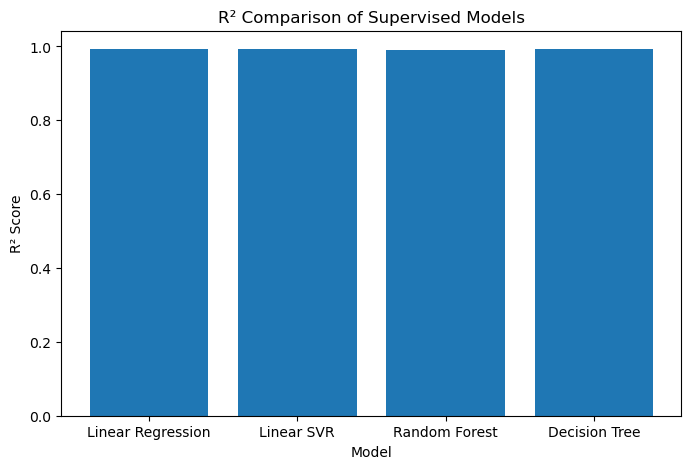

In [273]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Linear SVR', 'Random Forest', 'Decision Tree']
rmse_scores = [53.14, 52.71, 57.50, 53.12]
mae_scores = [38.54, 38.08, 43.44, 38.24]
r2_scores = [0.9929, 0.9930, 0.9917, 0.9929]

# RMSE
plt.figure(figsize=(8,5))
plt.bar(models, rmse_scores)
plt.xlabel('Model')
plt.ylabel('RMSE Score')
plt.title('RMSE Comparison of Supervised Models')
plt.show()

# MAE
plt.figure(figsize=(8,5))
plt.bar(models, mae_scores)
plt.xlabel('Model')
plt.ylabel('MAE Score')
plt.title('MAE Comparison of Supervised Models')
plt.show()

# R²
plt.figure(figsize=(8,5))
plt.bar(models, r2_scores)
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('R² Comparison of Supervised Models')
plt.show()
